# Tarea Python Avanzado

In [1]:
#1. Importar todas las librerías necesarias. (+0.15 puntos)

import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import time

In [3]:
#2. Inicializar algunas variables que después modificaremos. (+0.15 puntos)

df = None
datasets = []
#input para incluir la ruta donde se quiera guardar el csv donde estaran los datos
path = str(input('Ingresa la ruta donde se creara el archivo, debe ser algo asi, sin comillas (C:\Python\hosts.csv) y presiona enter: '))

Ingresa la ruta donde se creara el archivo, debe ser algo asi, sin comillas (C:\Python\hosts.csv) y presiona enter: C:\Python\hosts.csv


In [4]:
#3. Crear una función para generar los hostnames en base a unas reglas (+1.5 puntos)
""" ·La función se ha de llamar set_hostnames y debe recibir un parámetro llamado number_of_hosts de tipo int que represente el
        número de hosts que queremos generar
    ·El hostname debe estar compuesto por un total de 8 carácteres
        alfanuméricos, las letras siempre mayúsculas.
    ·El primer caracter debe indicar el sistema operativo, siendo L
        para Linux, S para Solaris, A para AIX y H para HP-UX. La proporción
        aproximada de sistemas operativos debe ser:
            ○ Linux: 40%
            ○ Solaris: 30%
            ○ AIX: 20%
            ○ HP-UX: 10%
    · El segundo caracter debe indicar el entorno, siendo D para
        Development, I para Integration, T para Testing, S para Staging y P
        para Production. La proporción aproximada de entornos debe ser:
            ○ Development: 10%
            ○ Integration: 10%
            ○ Testing: 25%
            ○ Staging: 25%
            ○ Production: 30%
    · Los tres siguientes caracteres deben indicar el país, siendo NOR
        para Norway, FRA para France, ITA para Italy, ESP para Spain, DEU
        para Germany e IRL para Ireland. La proporción aproximada de
        países debe ser:
            ○ Norway: 6%
            ○ France: 9%
            ○ Italy: 16%
            ○ Spain: 16%
            ○ Germany: 23%
            ○ Ireland: 30%
    · Por último 3 dígitos que indiquen el número de nodo que ya
        existe para un mismo sistema operativo, entorno y país. El valor
        debe ser incremental, comenzando en 001 y con un valor máximo
        de 999
"""

    
def set_hostnames(number_of_host: int) -> list:
    #Me salvo de un error por incluir un numero de hostname negativo o igual a 0
    if number_of_host <= 0:
        return "El numero de nodos seleccionado no es correcto, fin de la funcion"

    nodos = 0 #Variable que utilizo para el conteo de nodos lineas mas tarde
    data_hostname_storage = [] #Guardo la parte string de mi hostname que usare para añadir nodo en el caso de repeticion del string
    sistemas_operativos = ["L", "S", "A", "H"]
    #Con los bucles for añado segun la probabilidad determinada el numero de veces que aparece un os, entorno o country
    lista_prob_os = []
    for os in sistemas_operativos:
        if os == "L":
            lista_prob_os.extend(os * 4)
        if os == "S":
            lista_prob_os.extend(os * 3)
        if os == "A":
            lista_prob_os.extend(os * 2)
        if os == "H":
            lista_prob_os.extend(os * 1)

    entornos = ["D", "I", "T", "S", "P"]
    lista_prob_entorno = []
    for entorno in entornos:
        if entorno == "D":
            lista_prob_entorno.extend(entorno * 10)
        elif entorno == "I":
            lista_prob_entorno.extend(entorno * 10)
        elif entorno == "T":
            lista_prob_entorno.extend(entorno * 25)
        elif entorno == "S":
            lista_prob_entorno.extend(entorno * 25)
        elif entorno == "P":
            lista_prob_entorno.extend(entorno * 30)

    paises = ['NOR', 'FRA', 'ITA', 'ESP', 'DEU', 'IRE']
    lista_prob_paises = []
    for pais in paises:
        if pais == "NOR":
            lista_prob_paises.extend([pais] * 6)
        elif pais == "FRA":
            lista_prob_paises.extend([pais] * 9)
        elif pais == "ITA":
            lista_prob_paises.extend([pais] * 16)
        elif pais == "ESP":
            lista_prob_paises.extend([pais] * 16)
        elif pais == "DEU":
            lista_prob_paises.extend([pais] * 23)
        elif pais == "IRE":
            lista_prob_paises.extend([pais] * 30)

    for host in range(number_of_host):
        caracter_os = rd.choice(lista_prob_os) #Eleccion de un os aleatorio
        caracter_entorno = rd.choice(lista_prob_entorno) #Eleccion de un entorno aleatorio
        caracter_paises = rd.choice(lista_prob_paises) #Eleccion de un country aleatorio
        hostname = (str(caracter_os).upper() + str(caracter_entorno).upper() + str(caracter_paises).upper()) #concateno los 3 elementos
        data_hostname_storage.append(hostname) #agrego a esta lista solo la parte string, sin el nodo, que utilizare para determinar el nodo
    element_repeat_check = [] #lista transitoria donde checkeo que es la primera vez o no que aparece un hostname (sin nodo)
    hostname_storage = [] #lista final, despues de checkear repeticion y que incluira el nodo

    for element in data_hostname_storage: #bucle for donde incluyo un if que incluira 001 al string si no esta repetido o en el caso
        #contrario entrara en el while que sumara 1 si existe ese hostname con ese nodo
        if element not in element_repeat_check:
            element_repeat_check.append(element)
            hostname_storage.append(str(str(element) + str(int("1")).zfill(3)))
        else: 
            check = False
            nodo = int("1")
            while check == False:
                repeated_hostname = str(element) + str(nodo).zfill(3)
                if repeated_hostname in hostname_storage:
                    nodo += 1
                else:
                    hostname_storage.append(repeated_hostname)
                    check = True

    return hostname_storage #devuelve la lista final


In [5]:
#4. Crear una función para obtener el nombre del SO. (+0.5 puntos)
# La función se ha de llamar get_os, debe recibir un parámetro llamado
#    hostname de tipo str y debe devolver una cadena Linux, Solaris, AIX o
#    HP-UX dependiendo de la primera letra del parámetro hostname. Debería
#    ser improbable que el hostname recibido como parámetro comience por
#    una letra diferente de L, S, A o H, pero de darse el caso, la función debe
#    devolver la cadena Unknow.

def get_os(hostname: str) -> str: #funcion para devolver el string correspondiente al os donde solo miro en el caracter [0] del hostname

    os = ""

    if hostname[0] == "L":
        os = "Linux"
    elif hostname[0] == "S":
        os = "Solaris"
    elif hostname[0] == "A":
        os = "AIX"
    elif hostname[0] == "H":
        os = "HP-UX"
    else:
        os = "Unknown"

    return os

In [6]:
#5. Crear una función para obtener el nombre del entorno. (+0.5 puntos)
#    La función se ha de llamar get_enviroment, debe recibir un parámetro
#    llamado hostname de tipo str y debe devolver una cadena Development,
#    Integration, Testing, Staging o Production dependiendo de la segunda
#    letra del parámetro hostname. Debería ser improbable que el hostname
#    recibido como parámetro tenga por segundo caracter por una letra
#    diferente de D, I, T, S o P, pero de darse el caso, la función debe devolver
#    la cadena Unknow.
    
def get_enviroment(hostname: str) -> str: #funcion para devolver el string correspondiente al entorno donde solo miro en el caracter [1] del hostname

    enviroment = ""

    if hostname[1] == "D":
        enviroment = "Development"
    elif hostname[1] == "I":
        enviroment = "Integration"
    elif hostname[1] == "T":
        enviroment = "Testing"
    elif hostname[1] == "S":
        enviroment = "Staging"
    elif hostname[1] == "P":
        enviroment = "Production"
    else:
        enviroment = "Unknown"

    return enviroment

In [7]:
#6. Creamos una función para obtener el nombre del país. (+0.5 puntos)
""" La función se ha de llamar get_country, debe recibir un parámetro
    llamado hostname de tipo str y debe devolver una cadena Norway,
    Germany, Italy, Spain, Ireland o France dependiendo de las letras de la
    tercera a la quinta del parámetro hostname. Debería ser improbable que el
    hostname recibido como parámetro tenga por caracteres en las
    posiciones 3, 4, 5, caracteres diferentes de NOR, DEU, ITA, ESP, IRL o FRA,
    pero de darse el caso, la función debe devolver la cadena Unknow."""
    
def get_country(hostname: str) -> str: #funcion para devolver el string correspondiente al country donde solo miro en los caracteres [2:5] del hostname
    
    country = ""

    if hostname[2:5] == "NOR":
        country = "Norway"
    elif hostname[2:5] == "FRA":
        country = "France"
    elif hostname[2:5] == "ITA":
        country = "Italy"
    elif hostname[2:5] == "ESP":
        country = "Spain"
    elif hostname[2:5] == "DEU":
        country = "Germany"
    elif hostname[2:5] == "IRE":
        country = "Ireland"
    else:
        country = "Unknown"

    return country


In [8]:
#7. Crear una función para generar el DataFrame. (+1 punto)
""" La función se ha de llamar set_dataframe y debe recibir un parámetro
    llamado count de tipo int, que represente el número de registros (filas)
    que vemos a generar. Para poder establecer un valor a la variable df que
    se encuentra fuera de la función y que inicialmente iniciamos con un
    valor None, debemos invocar a la variable df como global dentro de esta
    función. A continuación debemos llamar a la función set_hostnames
    pasándole como argumento el parámetro count. Después debemos ir
    añadiendo a la lista dataset que teníamos inicializada al principio de la
    práctica (primer punto) como lista vacía [] un diccionario por cada
    hostname de nuestra lista hostnames. Los campos de este diccionario
    deben ser:
            ● hostname: Por ejemplo LDIRL003.
            ● os: Por ejemplo Linux.
            ● enviroment: Por ejemplo Development.
            ● country: Por ejemplo Ireland.
            ● node: De tipo int, por ejemplo 3.
    Finalmente creamos un DataFrame utilizando los datos de la lista de
    diccionarios dataset y asignando el DataFrame de Pandas a la variable
    global df. """

def set_dataframe(count: int):
    #tomo las variables iniciales como variables de esta funcion con global
    global df, datasets
    #en este for, tomo la lista de hostname devuelta por set_hostname (incluido el nodo) y asigno el string correspondiente
    list_hostnames = set_hostnames(count)
    for numero in range(len(list_hostnames)):
        caracter_hostname = list_hostnames[numero]
        caracter_os = get_os(list_hostnames[numero])
        caracter_enviroment = get_enviroment(list_hostnames[numero])
        caracter_country = get_country(list_hostnames[numero])
        caracter_nodos = list_hostnames[numero][5:8]
        datasets.append({"Hostname": caracter_hostname, "os": caracter_os, "enviroment": caracter_enviroment,
                         "country": caracter_country,
                         "node": caracter_nodos})
        
    #creo un data frame con la variable datasets y la asigno como devolucion de la funcion
    df = pd.DataFrame(datasets)

    return df

In [9]:
#8. Crear el DataFrame. (+0.2 puntos)
""" Invocamos a la función set_dataframe pasándole como argumento el
    entero 1500. Inspeccionamos el DataFrame df para ver si se ha
    generado bien."""

#Checkeo los tiempos por si hubiera algun problema en esta fase de creacion de dataframes
inicio_df_creacion = time.time()
set_dataframe(1500)
final_df_creacion = time.time()
tiempo_creacion_df = final_df_creacion - inicio_df_creacion
print(f'El tiempo que tardo en crear el dataframe fue de {tiempo_creacion_df}')

El tiempo que tardo en crear el dataframe fue de 0.22225403785705566


In [10]:
#9. Guardar el DataFrame generado en un fichero CSV. (+0.5 puntos)
""" El dataframe df recién generado debemos volcarlo a un fichero CSV
    llamado hosts.csv, ubicado en la misma carpeta donde se encuentra el
    libro de Jupyter Notebook, debe incluir las cabeceras (header=True) y no
    debe incluir los índices (index=False). A continuación hay que hacer la
    prueba de leer el archivo generado mediante el método read_csv,
    almacenar el DataFrame en una variable llamada hosts_df y visualizarlo
    para ver si se ha generado bien. Se tiene que ver así (más o menos, los
    nombres de los hostnames evidentemente no tienen por qué ser
    exactamente iguales):"""

#Creo el fichero en csv y lo leo y muestro

fichero_csv = df.to_csv(path, sep = ";", header=True, index = False)
hosts_df = pd.read_csv(path, sep=";")
hosts_df

,Hostname,os,enviroment,country,node
0,SPESP001,Solaris,Production,Spain,1
1,HIIRE001,HP-UX,Integration,Ireland,1
2,LPIRE001,Linux,Production,Ireland,1
3,SPITA001,Solaris,Production,Italy,1
4,LDFRA001,Linux,Development,France,1
...,...,...,...,...,...
1495,APIRE029,AIX,Production,Ireland,29
1496,SSDEU022,Solaris,Staging,Germany,22
1497,LSIRE048,Linux,Staging,Ireland,48
1498,HTDEU007,HP-UX,Testing,Germany,7


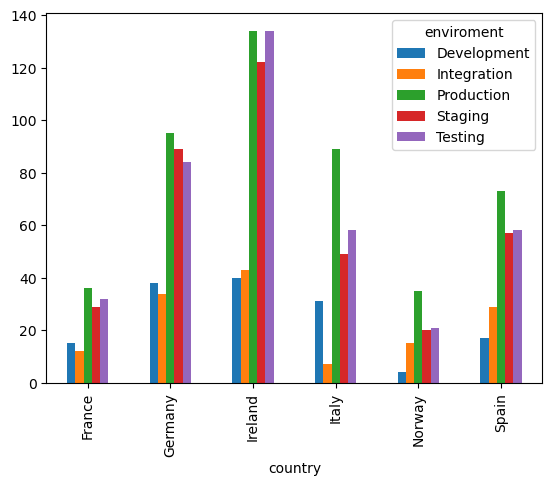

In [11]:
#10.Generar un único gráfico agrupando para cada país (country) los
#entornos (enviroment). (+0.5 puntos)
#Se debe utilizar la función unstack y se debe generar un plot de tipo
#barras (kind=bar).

#hago una copia al crear los graficos por si acaso hubiera un error, tener una "copia de seguridad" 
hosts_df_copy = hosts_df
df_enviroment = hosts_df_copy.groupby(['country',hosts_df_copy['enviroment']]).size()
df_enviroment.unstack().plot(kind = 'bar');

El tiempo que tardo en crear los graficos fue de 0.41260552406311035


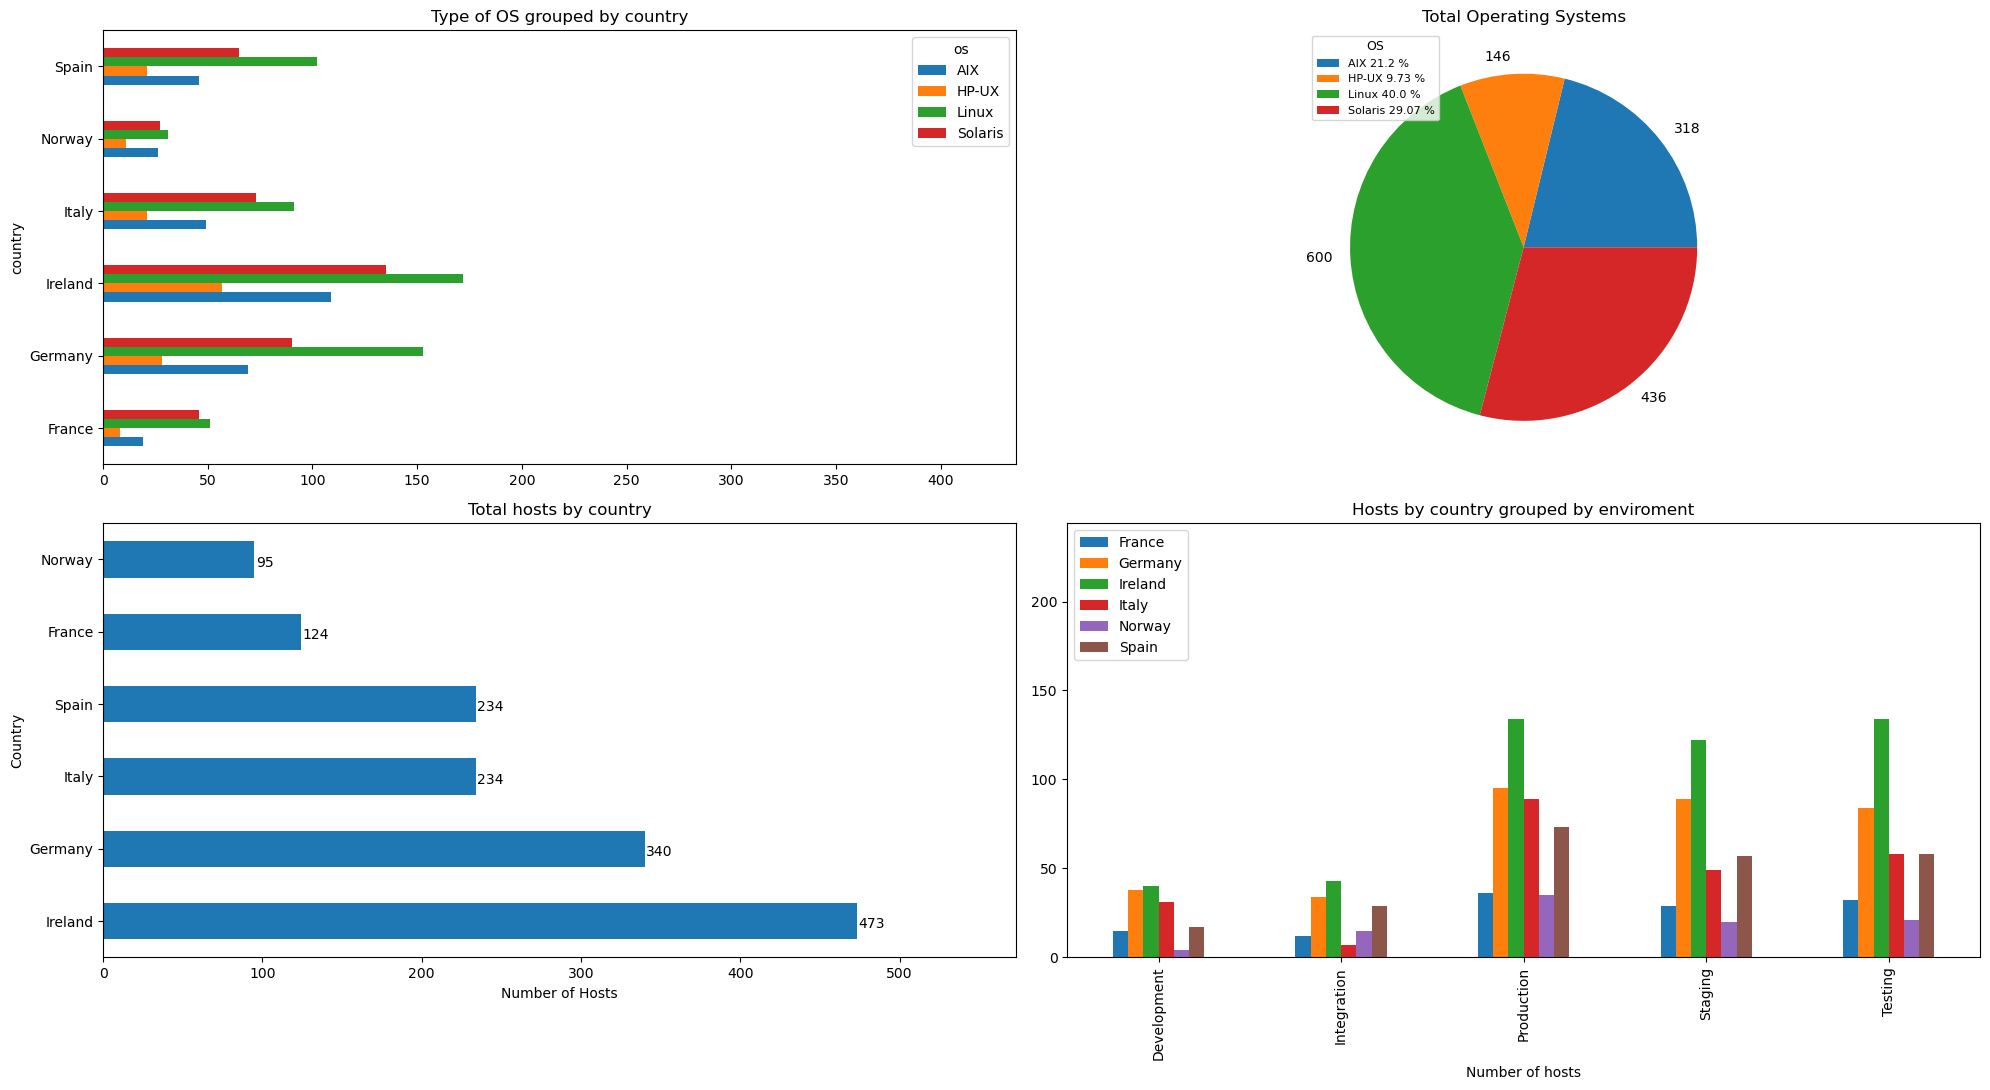

In [12]:
#11.Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas. (+4.5 puntos)
#       ● En la esquina superior izquierda debe aparecer un gráfico cuyo
#        título sea Type of OS grouped by country. Debe ser un gráfico de
#        barras horizontales que representen una agrupación (groupby) por
#        cada país (country) de los sistemas operativos (os) que tiene. Se
#        debe utilizar la función unstack y el plot debe ser de tipo barras
#        horizontales (barh).
#        ● En la esquina superior derecha debe aparecer un gráfico cuyo
#        título sea Total Operating Systems. Debe representar la cantidad
#       total de sistemas operativos (os) que hay en el DataFrame. Se
#        debe utilizar la función groupby y el gráfico debe ser de tipo tarta
#        (pie). Como etiquetas (labels) debe mostrar el número de
#        sistemas operativos de cada tipo, y además debe mostrarse una
#        leyenda (legend) en la esquina superior derecha en la que
#        aparezca para cada sistema operativo el porcentaje existente en
#        el DataFrame.
#        ● En la esquina inferior izquierda debe aparecer un gráfico cuyo
#        título sea Total hosts by country. Debe ser un gráfico de barras
#        horizontales que representen la cantidad total de hosts por cada
#        país, para ello se debe utilizar la función value_counts() sobre los
#        países (country) del DataFrame. El gráfico generado debe incluir
#        como etiqueta en el eje x el texto Number of hosts y como etiqueta
#        del eje y el texto Country. También se ha de incluir el número total
#        de hosts que tiene cada país a la derecha de cada barra
#        horizontal. Además, se ha de añadir como valor máximo del eje x
#        un número equivalente al número total de hosts+100, de este
#        modo se verá un pequeño margen a la derecha que hará que se
#        visualice un poco mejor. Opcionalmente (si se hace puntuará) se
#        puede añadir con la librería seaborn una paleta de colores
#       (color_palette) que podemos utilizar para darle un color
#        degradado a las barras.
#        ● En la esquina inferior derecha debe aparecer un gráfico cuyo
#        título sea Hosts by country grouped by enviroment. Debe
#        representar una agrupación (groupby) de hosts que hay por cada
#        país (country) y entorno (enviroment). Se debe utilizar la función
#        unstack(0) y el plot debe ser de tipo barras (bar). Como etiqueta
#        del eje y se debe añadir el texto Number of hosts.
#        Finalmente se deben ajustar los márgenes y espacios entre los
#       gráficos (fig.tight_layout()).

#mido los tiempos de ejecucion por si hubiera algun problema
inicio_creacion_grf = time.time()

#Creo la figura con la que voy a trabajar y le asigno un tamaño suficiente para su buena visualizacion
fig = plt.figure(figsize=(20,11))
#asigno a cada grafico un ax con el que trabajare cada grafico
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#dejo creadas las consultas que utilizare para los graficos
malla_barh1 = hosts_df_copy.groupby(['country','os']).size().unstack() #Datos unidos primer grafico (ax1)
malla_tarta = hosts_df_copy.groupby('os').size() #Datos unidos segundo grafico (ax2)
malla_barh2 = hosts_df_copy.value_counts('country') #Datos grafico 3 (ax3)
malla_bar = hosts_df_copy.groupby(['country','enviroment']).size().unstack(0) #Datos unidos ultimo grafico (ax4)

#Primer grafico
malla_barh1.plot.barh(ax = ax1) #asignacion a la ax correspondiente y seleccion del grafico correcto
ax1.set_xlim(right=sum(malla_barh1[max(malla_barh1)].fillna(0))) #le añado un limite para que se vea bien con sumatorio de la columna con el valor maximo
ax1.set_title('Type of OS grouped by country') #incluyo el titulo

#Segundo grafico
malla_tarta.plot.pie(ax = ax2, labels = [malla_tarta['AIX'],malla_tarta['HP-UX'],malla_tarta['Linux'],malla_tarta['Solaris']]) #asignacion a la ax correspondiente, seleccion del grafico correcto y pongo las etiquetas con los valores
ax2.set_title("Total Operating Systems") #incluyo el titulo
ax2.legend([str('AIX'+' '+str(round(float(malla_tarta['AIX']/float(malla_tarta['AIX']+malla_tarta['HP-UX']+malla_tarta['Linux']+malla_tarta['Solaris'])*100),2))+' '+'%')
               ,str('HP-UX'+' '+str(round(float(malla_tarta['HP-UX']/float(malla_tarta['AIX']+malla_tarta['HP-UX']+malla_tarta['Linux']+malla_tarta['Solaris'])*100),2))+' '+'%')
               ,str('Linux'+' '+str(round(float(malla_tarta['Linux']/float(malla_tarta['AIX']+malla_tarta['HP-UX']+malla_tarta['Linux']+malla_tarta['Solaris'])*100),2))+' '+'%')
               ,str('Solaris'+' '+str(round(float(malla_tarta['Solaris']/float(malla_tarta['AIX']+malla_tarta['HP-UX']+malla_tarta['Linux']+malla_tarta['Solaris'])*100),2))+' '+'%')]
           ,loc = 'upper left',title = 'OS',fontsize = 8,title_fontsize = 9)
#creo la leyenda calculando los porcentajes y seleccionando el os adecuado (aprovechando que se ordena alfabeticamente) y le doy formato y lugar

#Tercer grafico
malla_barh2.plot.barh(ax = ax3) #selecciono el ax y el tipo de grafico correcto
ax3.set_title("Total hosts by country") #asigno el titulo y las etiquetas en estes lineas
ax3.set_xlabel('Number of Hosts')
ax3.set_ylabel('Country')
for i,j in enumerate(malla_barh2):
    ax3.annotate(str(j), xy = (j + 0.8,i-0.1))
ax3.set_xlim(right=max(malla_barh2) + 100)
#con este bucle for incluyo el valor de cada country en la posicion correspondiente utilizando los valores y la posicion como x e y (ancho y alto)
#ademas de darle margen derecho para que se vean bien los valores

#Cuarto grafico
malla_bar.plot.bar(ax = ax4)
ax4.set_title("Hosts by country grouped by enviroment")
ax4.set_xlabel('Number of hosts')
ax4.legend(loc = 'upper left')
ax4.set_ylim(top=sum(malla_bar[max(malla_bar)].fillna(0)) + 10)
#seleccion ax correspondiente incluyo titulos y eiquetas (ademas de la posicion de la legenda) y le invluyo una altura suficiente para que se vea correctamente

fig.tight_layout() #ajusto margenes y espacios

final_creacion_grf = time.time() #checkeo el tiempo que tarda en realizarse los graficos


tiempo_creac_grf = final_creacion_grf - inicio_creacion_grf
print(f'El tiempo que tardo en crear los graficos fue de {tiempo_creac_grf}')